# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.When the people fill up a form providing their email address or phone number, they are classified to be a lead.Although X Education gets a lot of leads, its lead conversion rate is very poor(30%).To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

## Goal of the Case Study


To Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# 1)Importing the  libraries

In [2709]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## 2)Importing and Understanding the data

In [2710]:
# Reading the data from leads.csv file
Leads_data=pd.read_csv("Leads.csv")

In [2711]:
# looking the data
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2712]:
# Finding total rows and columns in the data
Leads_data.shape

(9240, 37)

- There are 9240 rows and 37 columns in the file

In [2713]:
# Datatypes and count of each colums of the data
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2714]:
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 3)Data Cleaning

In [2715]:
# Replacing the select with nan
Leads_data=Leads_data.replace("Select", np.nan)

In [2716]:
# checking the null values
Leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [2717]:
# null values with percentage,with respect to the column
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [2718]:
# Columns which having null values more than 40 
colums_with_nullvalues = list(Leads_data.columns[100*Leads_data.isnull().mean()>40])
colums_with_nullvalues

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [2719]:
# Dropping the columns which are having null values more then 40%
Leads_data=Leads_data.drop(colums_with_nullvalues,axis=1)

In [2720]:
# Checking whether the columns which are having null values more then 40% are eliminated or not
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [2721]:
Leads_data.shape

(9240, 30)

- There are 9240 rows and 30 columns after removing the columns which are having null values more then 40%

In [2722]:
# Checking the dublicates
Leads_data_dub=Leads_data
Leads_data_dub.drop_duplicates(subset=None, inplace=True)
Leads_data_dub.shape

(9240, 30)

- There are no duplicate rows based on all columns as the shape of dataset is same after using drop_duplicates

In [2723]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2724]:
# looking in to values of category variables
for column in Leads_data:
    print(Leads_data[column].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [2725]:
sum(Leads_data.duplicated(subset = 'Prospect ID')) == 0

True

In [2726]:
sum(Leads_data.duplicated(subset = 'Lead Number')) == 0

True

- There are no dublicates in  Prospect ID and Lead Number,i.e both are having unique values

In [2727]:
# Looking in to Lead Origin
Leads_data['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [2728]:
# Lead Source
Leads_data['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [2729]:
# replacing the values with less number with others 
Leads_data['Lead Source'] =  Leads_data['Lead Source'].replace([np.nan,'bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Others')

In [2730]:
# checking whether the values with less numbers are replaced with others
Leads_data['Lead Source'].value_counts(dropna = False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
google                 5
Name: Lead Source, dtype: int64

In [2731]:
# There are two googles in the data.converting google to Google
Leads_data['Lead Source'] = Leads_data['Lead Source'].replace('google','Google')

In [2732]:
Leads_data['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

In [2733]:
# Looking in to Do Not Email
Leads_data['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [2734]:
# Looking in to Do Not Call
Leads_data['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

- The no are significantly more when compared to yes,so need to drop Do Not Call

In [2735]:
Leads_data = Leads_data.drop(['Do Not Call'],axis =1)

In [2736]:
# Looking in to Converted
Leads_data['Converted'].value_counts(dropna = False)

0    5679
1    3561
Name: Converted, dtype: int64

In [2737]:
# Looking in to Last Activity
Leads_data['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2738]:
# replacing nan with Email Opened as it is having majority number
Leads_data['Last Activity'] = Leads_data['Last Activity'].replace(np.nan, 'Email Opened')

In [2739]:
# replacing the values with less number with others 
Leads_data['Last Activity'] = Leads_data['Last Activity'] .replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [2740]:
# checking whether the values with less numbers are replaced with others
Leads_data['Last Activity'].value_counts(dropna = False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

In [2741]:
# Looking in to Country
Leads_data['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- As country having very unique values and there is no siginificance.Hence dropping Country

In [2742]:
Leads_data = Leads_data.drop(['Country'],axis =1)

In [2743]:
# Looking in to Specialization
Leads_data['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2744]:
# replacing nan with not mentioned 
Leads_data['Specialization'] = Leads_data['Specialization'].replace(np.nan, 'not mentioned')

In [2745]:
# Looking in to What is your current occupation
Leads_data['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2746]:
# replacing nan with Unemployed as it is having majority number
Leads_data['What is your current occupation'] = Leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [2747]:
Leads_data['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2748]:
# Looking in to What matters most to you in choosing a course
Leads_data['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- need to drop What matters most to you in choosing a course because there is no significant data

In [2749]:
Leads_data = Leads_data.drop(['What matters most to you in choosing a course'],axis =1)

In [2750]:
# Looking in to Search
Leads_data['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

- need to Search What matters most to you in choosing a course because there is no significant data

In [2751]:
Leads_data = Leads_data.drop(['Search'],axis =1)

In [2752]:
# Looking in to Magazine
Leads_data['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

- need to drop Magazine because there is no significant data

In [2753]:
Leads_data = Leads_data.drop(['Magazine'],axis =1)

In [2754]:
# Looking in to Newspaper Article
Leads_data['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

- need to drop Newspaper Article because there is no significant data

In [2755]:
Leads_data = Leads_data.drop(['Newspaper Article'],axis =1)

In [2756]:
# Looking in to X Education Forums
Leads_data['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

- need to X Education Forums xx because there is no significant data

In [2757]:
Leads_data = Leads_data.drop(['X Education Forums'],axis =1)

In [2758]:
# Looking in to Newspaper
Leads_data['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

- need to drop Newspaper because there is no significant data

In [2759]:
Leads_data = Leads_data.drop(['Newspaper'],axis =1)

In [2760]:
# Looking in to Digital Advertisement
Leads_data['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

- need to drop Digital Advertisement because there is no significant data

In [2761]:
Leads_data = Leads_data.drop(['Digital Advertisement'],axis =1)

In [2762]:
# Looking in to Through Recommendations
Leads_data['Through Recommendations'].value_counts(dropna = False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

- need to drop Through Recommendations because there is no significant data

In [2763]:
Leads_data = Leads_data.drop(['Through Recommendations'],axis =1)

In [2764]:
# Looking in to Converted
Leads_data['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

- need to drop Receive More Updates About Our Courses because there is no significant data

In [2765]:
Leads_data = Leads_data.drop(['Receive More Updates About Our Courses'],axis =1)

In [2766]:
# Looking in to Tags
Leads_data['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [2767]:
# replacing nan with not mentioned 
Leads_data['Tags'] = Leads_data['Tags'].replace(np.nan, 'not mentioned')

In [2768]:
# replacing the values with less number with others 
Leads_data['Tags'] = Leads_data['Tags'] .replace(['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Others')

In [2769]:
# checking whether the values with less numbers are replaced with others
Leads_data['Tags'].value_counts(dropna = False)

not mentioned                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Others                                  156
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Name: Tags, dtype: int64

In [2770]:
# Looking in to Update me on Supply Chain Content
Leads_data['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

- need to drop Update me on Supply Chain Content because there is no significant data

In [2771]:
Leads_data = Leads_data.drop(['Update me on Supply Chain Content'],axis =1)

In [2772]:
# Looking in to Get updates on DM Content
Leads_data['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

- need to drop Get updates on DM Content because there is no significant data

In [2773]:
Leads_data = Leads_data.drop(['Get updates on DM Content'],axis =1)

In [2774]:
# Looking in to City
Leads_data['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- need to drop City because there is no significant data

In [2775]:
Leads_data = Leads_data.drop(['City'],axis =1)

In [2776]:
# Looking in to I agree to pay the amount through cheque
Leads_data['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

- need to drop I agree to pay the amount through cheque because there is no significant data

In [2777]:
Leads_data = Leads_data.drop(['I agree to pay the amount through cheque'],axis =1)

In [2778]:
# Looking in to A free copy of Mastering The Interview
Leads_data['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [2779]:
# Looking in to Last Notable Activity
Leads_data['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [2780]:
# replacing the values with less number with others 
Leads_data['Last Notable Activity'] = Leads_data['Last Notable Activity'] .replace(['Unreachable','Had a Phone Conversation ','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received','Had a Phone Conversation'],'Others')

In [2781]:
# checking whether the values with less numbers are replaced with others
Leads_data['Last Notable Activity'].value_counts(dropna = False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Others                       53
Unsubscribed                 47
Name: Last Notable Activity, dtype: int64

In [2782]:
# Checking the data after dropping the necessary columns
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [2783]:
# Checking the null values with respect to columns
Leads_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
Tags                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [2784]:
# replacing null values in the TotalVisits with median
Leads_data['TotalVisits'] = Leads_data['TotalVisits'].replace(np.nan,Leads_data['TotalVisits'].median())

In [2785]:
# replacing null values in the Page Views Per Visit with median
Leads_data['Page Views Per Visit'] = Leads_data['Page Views Per Visit'].replace(np.nan,Leads_data['Page Views Per Visit'].median())

In [2786]:
Leads_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

- There are no null values in every column in the data 

In [2787]:
# Dropping Prospect ID and Lead Number as they not require for analysis
Leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [2788]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

# 4)Data Understanding

In [2789]:
# storing the numerical columns in the data in NumericalColoums
NumericalColoums = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

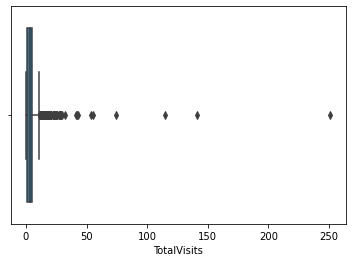

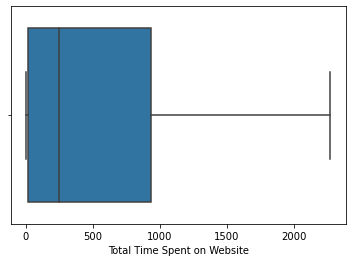

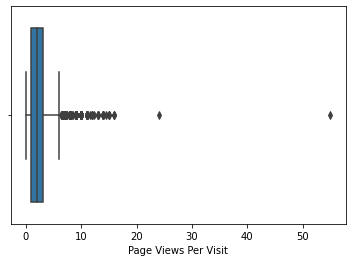

In [2790]:







for i in NumericalColoums:
    sns.boxplot(Leads_data[i])
    plt.show() 

- There are some outliers in TotalVisits and Page Views Per Visit columns.Treating it using interquartile

In [2791]:
q1 = Leads_data['TotalVisits'].describe()['25%']
q3 =  Leads_data['TotalVisits'].describe()['75%']
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
Leads_data['TotalVisits'] = np.where(Leads_data['TotalVisits']<lb,lb,Leads_data['TotalVisits'])
Leads_data['TotalVisits'] = np.where(Leads_data['TotalVisits']>ub,ub,Leads_data['TotalVisits'])

In [2792]:
q1 = Leads_data['Page Views Per Visit'].describe()['25%']
q3 = Leads_data['Page Views Per Visit'].describe()['75%']
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
Leads_data['Page Views Per Visit'] = np.where(Leads_data['Page Views Per Visit']<lb,lb,Leads_data['Page Views Per Visit'])
Leads_data['Page Views Per Visit'] = np.where(Leads_data['Page Views Per Visit']>ub,ub,Leads_data['Page Views Per Visit'])

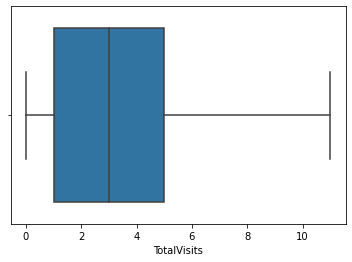

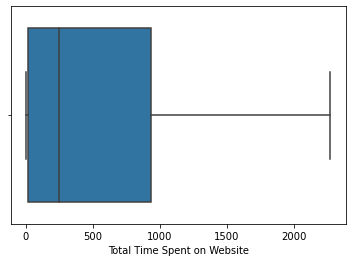

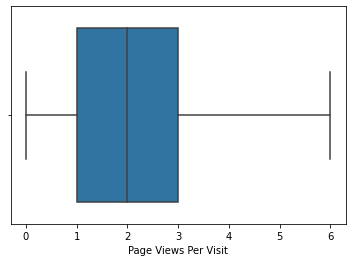

In [2793]:
for i in NumericalColoums:
    sns.boxplot(Leads_data[i])
    plt.show() 

- There are no outliers in the numerical columns

### Univariate analysis

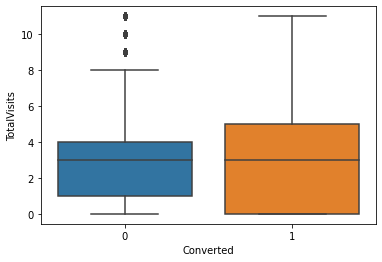

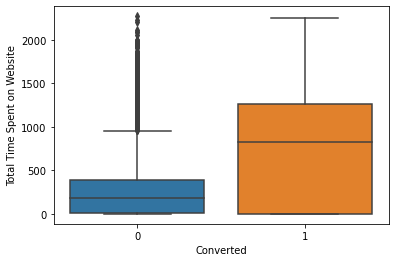

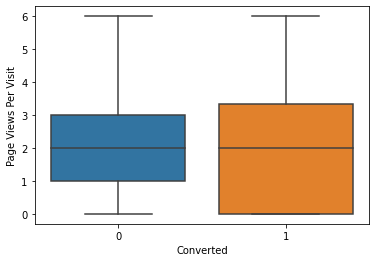

In [2794]:
# comparing the numerical columns with target variable i.e converted
for i in NumericalColoums:
    sns.boxplot(y = Leads_data[i], x= 'Converted', data = Leads_data)
    plt.show() 

- From the first figure, we can see that the median number of visits for both the converted as well as non-converted leads are more or less the same.So it seems that the total visits does not affect the conversion in general. There are outliers however that shows some of the leads having more number of visits but not converted.
- The total time spent on the website is clearly more for the converted leads. So it seems that the time spent is positively correlated to the conversion.
- The average number of pages visited during the website views also don't seem to affect the conversion much.

### bivariate analysis

In [2795]:
# storing the categorical columns in the data in categoricalcolumns
categoricalcolumns = ['Lead Origin', 'Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','Tags','A free copy of Mastering The Interview','Last Notable Activity']

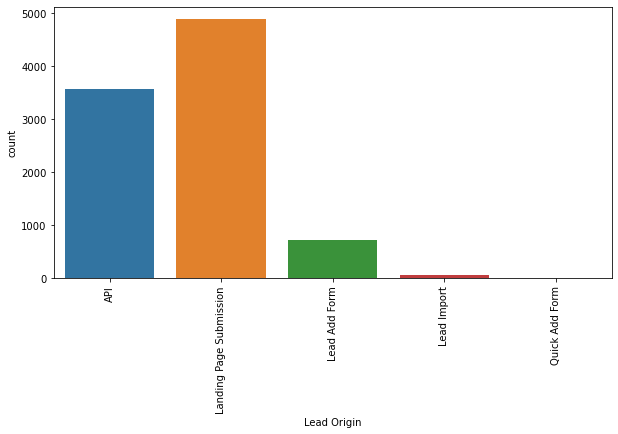

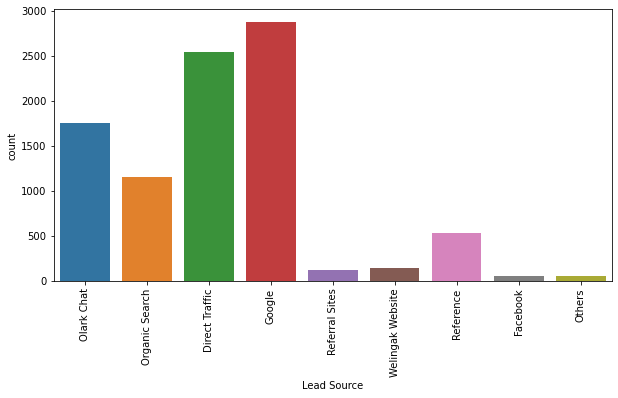

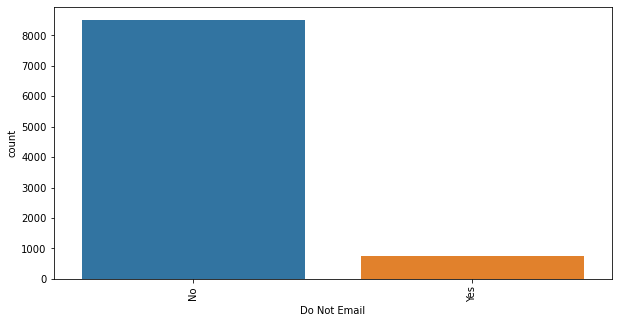

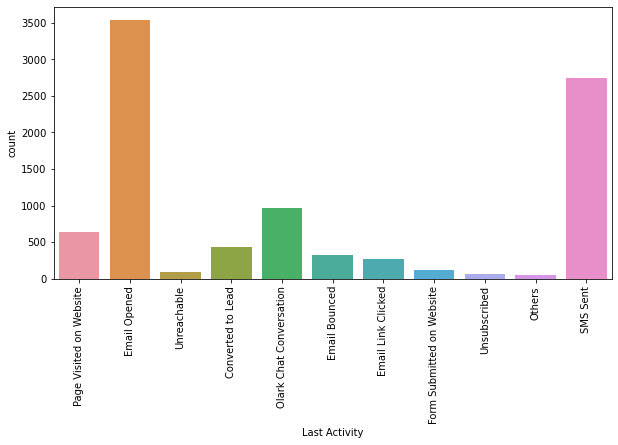

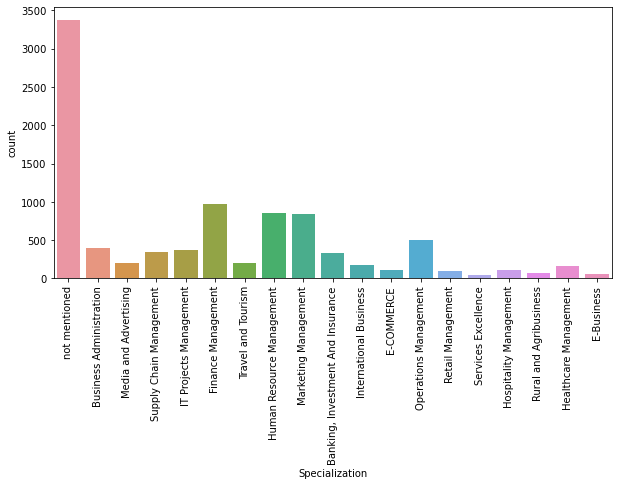

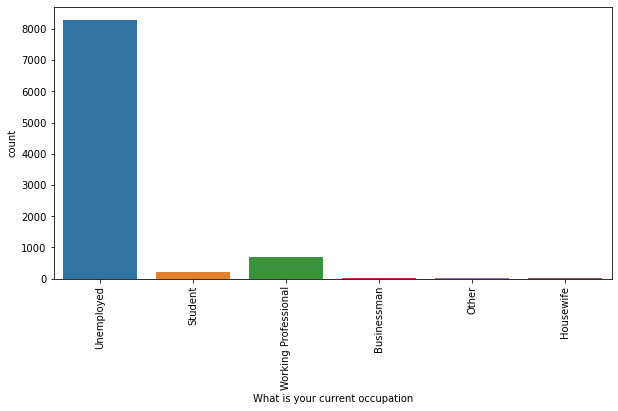

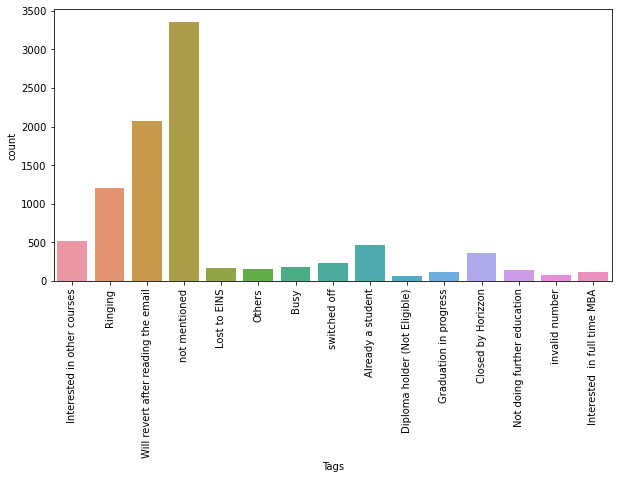

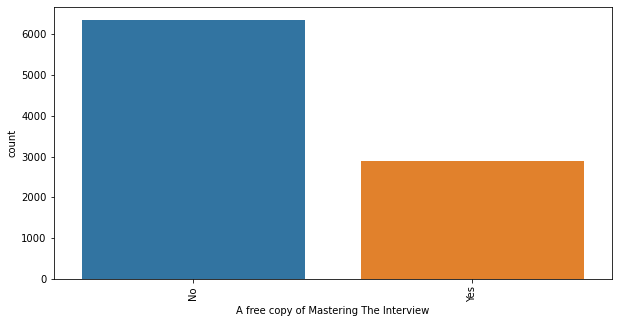

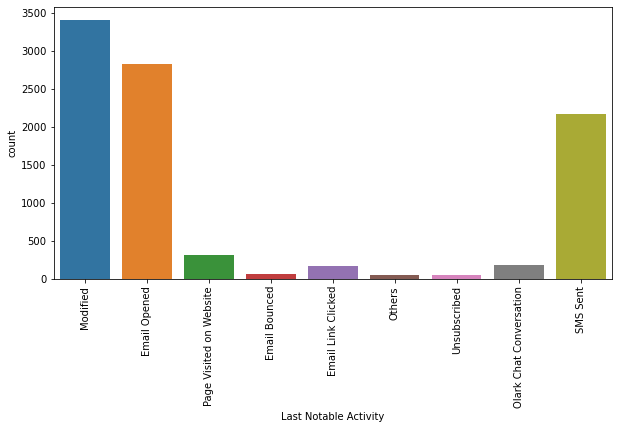

In [2796]:
for i in categoricalcolumns:
    plt.figure(figsize=(10,5))
    sns.countplot(Leads_data[i])
    plt.xticks(rotation=90)
    plt.show()

- The first figure shows that the lead origin is significant from Lead Add form.
- Irrespective of the fact whether a lead gets converted or not, Google is the source of most of the leads. However, it is the reference that plays somewhat important role in the conversion since in this case, the number of conversions are higher than non-conversions.
- Most of the leads have opted not to be mailed about the course.
- The last activity performed by the converted leads is SMS sent to a significant degree.
- Most of the leads have refrained from mentioning his/her specialization. Others who have mentioned don't seem to reflect significant pattern in conversion.
- Most of the leads are unemployed. However, the degree of conversion is more among the working professionals.
- Most of the customers don't want a free copy of matering the interview.
- The last notable activity for most of the converted leads is SMS sent.Email opened and modified are also some significant activity but mostly done by both the categories of leads.

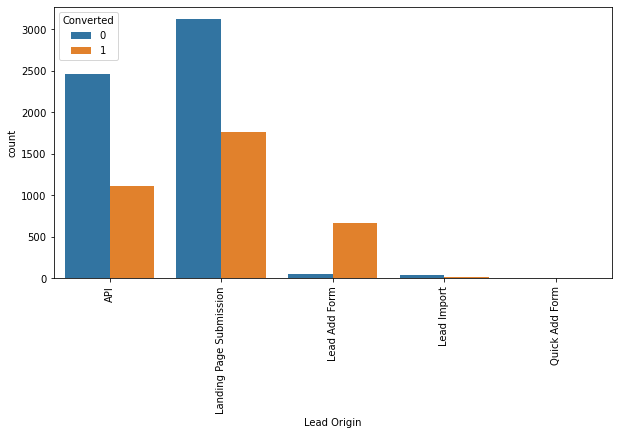

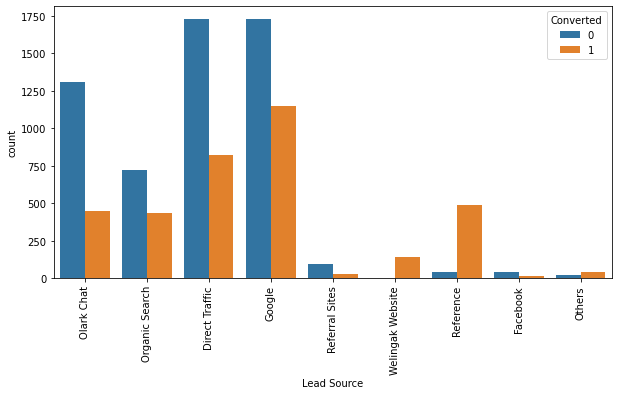

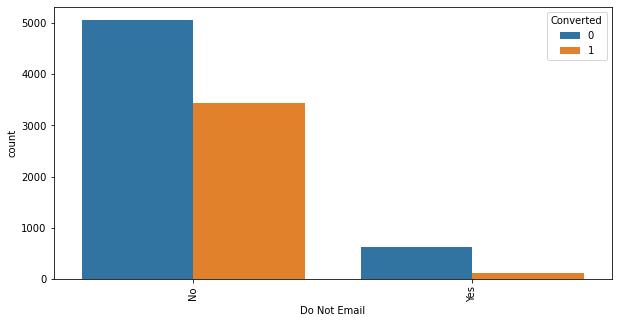

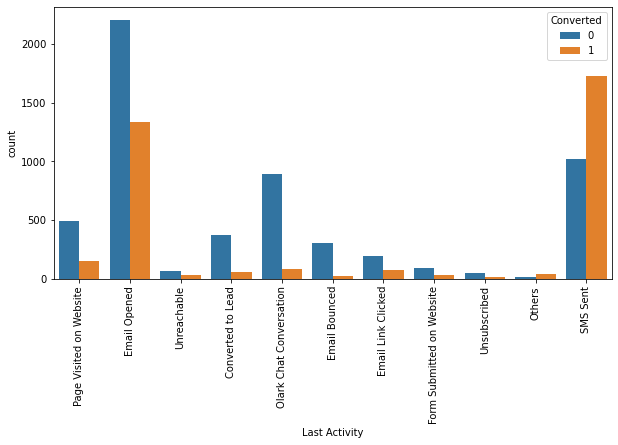

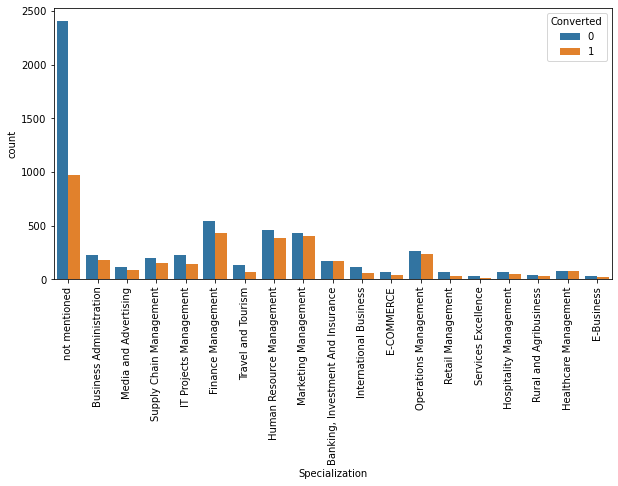

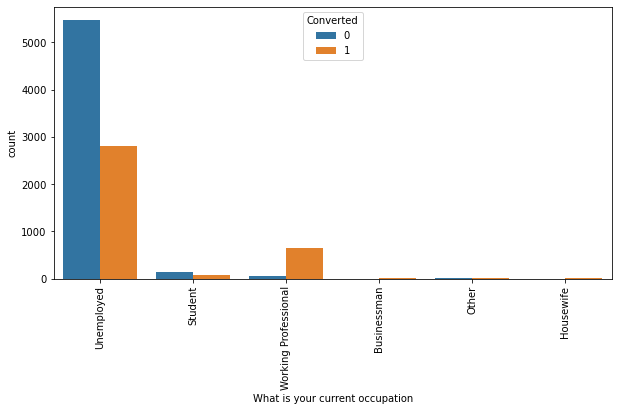

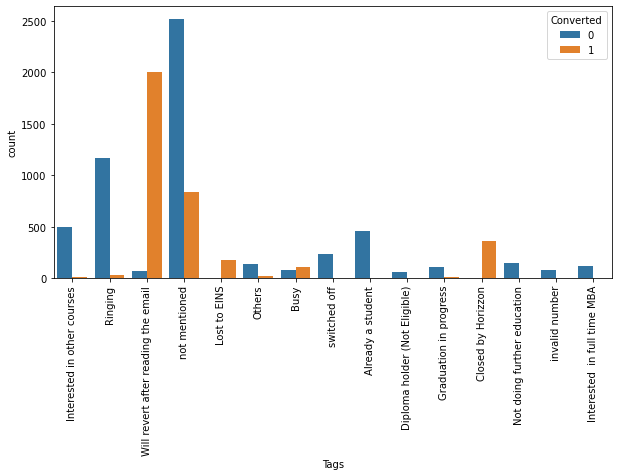

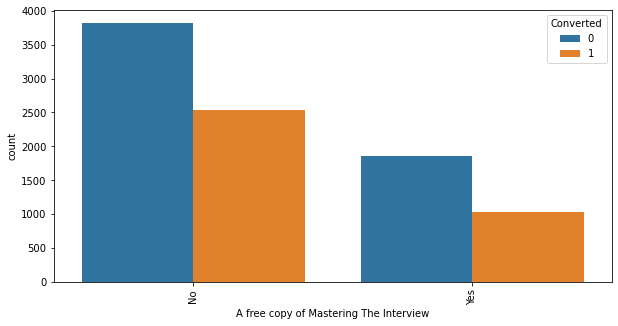

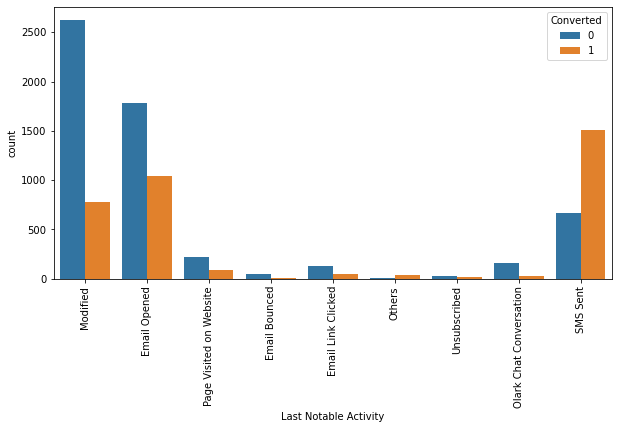

In [2797]:
# comparing the categorical columns with target variable i.e converted
for i in categoricalcolumns:
    plt.figure(figsize=(10,5))
    sns.countplot(x = Leads_data[i], hue= Leads_data['Converted'], data =  Leads_data)
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

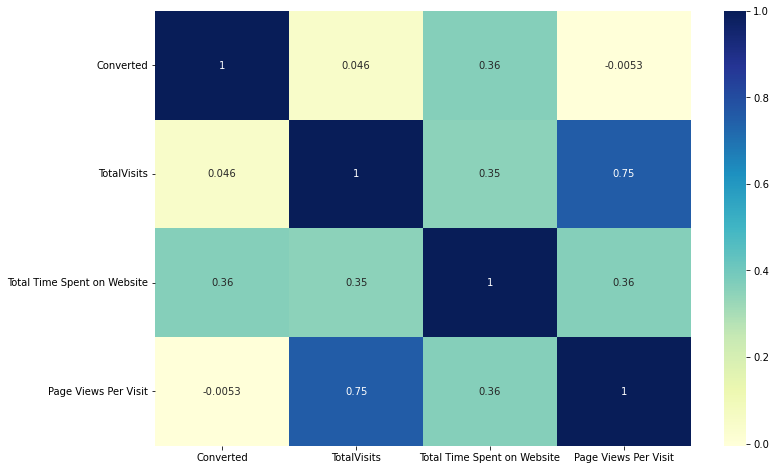

In [2798]:
# checking correlation using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(Leads_data.corr(), annot = True, cmap = "YlGnBu")

In [2799]:
# convertion rate
(sum(Leads_data['Converted'])/len(Leads_data['Converted'].index))*100


38.53896103896104

### Mapping yes to 1 and no to 0 in the required columns

In [2800]:
# Mapping yes to 1 and no to 0 in the Do Not Email columns
Leads_data['Do Not Email'] = Leads_data['Do Not Email'].map({'Yes': 1, 'No': 0})

In [2801]:
# Mapping yes to 1 and no to 0 in the A free copy of Mastering The Interview columns
Leads_data['A free copy of Mastering The Interview'] = Leads_data['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [2802]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not mentioned,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,not mentioned,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,not mentioned,Unemployed,Will revert after reading the email,0,Modified


In [3139]:
Leads_data1 =Leads_data



# 5)Dummy variable creation

In [3140]:
# checking the columns which are having object datatype in data
temp = Leads_data1.loc[:, Leads_data1.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [3141]:
# creating dummies for the colums
dummy = pd.get_dummies(Leads_data1[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity']], drop_first=True)

In [3142]:
# concatinating dummies with data
Leads_data1 = pd.concat([Leads_data1, dummy], axis=1)

In [3143]:
# dropping the columns
Leads_data1 = Leads_data1.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity'], 1)

In [3144]:
Leads_data1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Tags_not mentioned,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# 6)Test-train Split

In [3145]:
# dropping target variable 'Converted' from X
X = Leads_data1.drop(['Converted'], 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Tags_not mentioned,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3146]:
y = Leads_data1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [3147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 7)Scaling

In [3148]:
scaler = MinMaxScaler()
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Tags_not mentioned,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
1871,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6795,0,0.363636,0.214349,0.221667,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3516,0,0.454545,0.046655,0.416667,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8105,0,0.454545,0.541373,0.833333,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3934,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [3149]:
Leads_data1.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Tags_not mentioned,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
Do Not Email,1.000000,-0.135580,0.000337,-0.046374,0.019670,0.055762,0.095304,-0.020983,-0.017529,0.035416,...,0.061299,0.027514,-0.037624,-0.188089,0.117259,-0.013032,-0.006413,0.049921,-0.025990,0.243408
Converted,-0.135580,1.000000,0.046238,0.362483,-0.005289,-0.039820,-0.051236,0.321702,-0.023695,0.013138,...,-0.210985,-0.123718,-0.035555,-0.021955,-0.244294,-0.072660,0.057638,-0.036051,0.351845,-0.012858
TotalVisits,0.000337,0.046238,1.000000,0.351107,0.753953,0.294352,0.443097,-0.258802,-0.047693,-0.000791,...,-0.120084,0.033498,-0.011896,0.080413,-0.151655,-0.058600,0.030300,0.202963,0.016307,0.006798
Total Time Spent on Website,-0.046374,0.362483,0.351107,1.000000,0.360425,0.168298,0.276009,-0.139681,-0.034926,0.032831,...,-0.156190,-0.027902,-0.037113,0.009585,-0.106857,-0.051402,0.021335,0.026644,0.125076,0.000503
Page Views Per Visit,0.019670,-0.005289,0.753953,0.360425,1.000000,0.299516,0.553423,-0.297954,-0.055373,-0.001492,...,-0.147549,0.056236,-0.029635,0.080598,-0.118344,-0.099365,0.025877,0.034181,0.068067,0.020101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Olark Chat Conversation,-0.013032,-0.072660,-0.058600,-0.051402,-0.099365,-0.057305,-0.114790,-0.029654,-0.011000,-0.001479,...,0.096269,-0.018329,-0.019635,-0.094377,-0.108636,1.000000,-0.010797,-0.026836,-0.078798,-0.010164
Last Notable Activity_Others,-0.006413,0.057638,0.030300,0.021335,0.025877,0.001344,0.002797,-0.000634,-0.005878,-0.000790,...,-0.021556,-0.012403,-0.010492,-0.050429,-0.058049,-0.010797,1.000000,-0.014339,-0.042105,-0.005431
Last Notable Activity_Page Visited on Website,0.049921,-0.036051,0.202963,0.026644,0.034181,0.037921,0.046200,-0.023752,-0.014609,-0.001964,...,0.006920,0.010228,-0.026078,-0.125347,-0.144285,-0.026836,-0.014339,1.000000,-0.104656,-0.013499
Last Notable Activity_SMS Sent,-0.025990,0.351845,0.016307,0.125076,0.068067,0.028704,0.057507,0.092690,-0.039579,-0.005767,...,-0.121645,0.057099,-0.076573,-0.368056,-0.423664,-0.078798,-0.042105,-0.104656,1.000000,-0.039637


In [3150]:
# # Checking correlation
# plt.figure(figsize = (34,12))
# sns.heatmap(X_train.corr(),annot = True)
# plt.show()

# 8)Model Building

In [3151]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1209.9
Date:                Tue, 21 Mar 2023   Deviance:                       2419.7
Time:                        23:00:33   Pearson chi2:                 1.50e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6153
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9706      1.988     -3.507      0.000     -10.866      -3.075
Do Not Email                                            -0.7500      0.313     -2.394      0.017      -1.364      -0.136
TotalVisits                                              1.4196      0.326      4.350      0.000       0.780       2.059
Total Time Spent on Website                              4.3851      0.261     16.809      0.000       3.874       4.896
Page Views Per Visit                                    -1.0495      0.334     -3.146      0.002      -1.703      -0.396
A free copy of Mastering The Interview                  -0.2352      0.180     -1.309      0.191      -0.587       0.117
Lead Origin_Landing Page Submission                     -0.5969      0.234     -2.549      0.011      -1.056      -0.138
Lead Origin_Lead Add Form                                1.3788      1.038      1.328      0.184      -0.656       3.413
Lead Origin_Lead Import                                  1.2826      1.752      0.732      0.464      -2.151       4.716
Lead Origin_Quick Add Form                              24.2233   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                    -1.6353      1.745     -0.937      0.349      -5.056       1.785
Lead Source_Google                                       0.0925      0.186      0.497      0.619      -0.272       0.457
Lead Source_Olark Chat                                   0.8126      0.250      3.253      0.001       0.323       1.302
Lead Source_Organic Search                               0.0208      0.217      0.096      0.924      -0.405       0.446
Lead Source_Others                                       0.8494      0.835      1.018      0.309      -0.787       2.485
Lead Source_Reference                                   -0.5480      1.109     -0.494      0.621      -2.722       1.626
Lead Source_Referral Sites                              -0.1181      0.462     -0.256      0.798      -1.023       0.787
Lead Source_Welingak Website                             3.7218      1.275      2.920      0.004       1.223       6.220
Last Activity_Email Bounced                             -0.6343      0.766     -0.828      0.408      -2.137       0.868
Last Activity_Email Link Clicked                         1.1010      0.632      1.743      0.081      -0.137       2.339
Last Activity_Email Opened                               0.4202      0.435      0.965      0.335      -0.433       1.274
Last Activity_Form Submitted on Website                  0.6825      0.648      1.053      0.292      -0.588       1.953
Last Activity_Olark Chat Conversation                   -0

In [3152]:
logr = LogisticRegression()
rfe = RFE(estimator=logr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [3153]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Origin_Quick Add Form', False, 23),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 38),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 27),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Vi

In [3154]:
# rfe supported columns
rfe_support_columns = X_train.columns[rfe.support_]
rfe_support_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Others', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_not mentioned', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Model1

In [3155]:

X_train_rfe = sm.add_constant(X_train[rfe_support_columns])
logregm1 = sm.GLM(y_train,X_train_rfe,family = sm.families.Binomial())
m1 = logregm1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.0
Date:                Tue, 21 Mar 2023   Deviance:                       2559.9
Time:                        23:00:36   Pearson chi2:                 9.12e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4156      0.207    -16.504      0.000      -3.821      -3.010
TotalVisits                                       1.0624      0.300      3.537      0.000       0.474       1.651
Total Time Spent on Website                       3.9094      0.231     16.961      0.000       3.458       4.361
Page Views Per Visit                             -2.0677      0.280     -7.375      0.000      -2.617      -1.518
Lead Origin_Lead Add Form                         0.8155      0.364      2.242      0.025       0.103       1.528
Lead Source_Welingak Website                      4.0219      0.823      4.885      0.000       2.408       5.636
Last Activity_Others                              1.4287      0.905      1.579      0.114      -0.344       3.202
Last Activity_SMS Sent                            1.9911      0.117     16.953      0.000       1.761       2.221
Tags_Busy                                         2.2483      0.288      7.815      0.000       1.684       2.812
Tags_Closed by Horizzon                           9.1698      1.038      8.835      0.000       7.135      11.204
Tags_Diploma holder (Not Eligible)              -21.1780    1.7e+04     -0.001      0.999   -3.33e+04    3.33e+04
Tags_Lost to EINS                                 7.9827      0.754     10.586      0.000       6.505       9.461
Tags_Ringing                                     -1.6430      0.287     -5.717      0.000      -2.206      -1.080
Tags_Will revert after reading the email          6.3404      0.253     25.071      0.000       5.845       6.836
Tags_invalid number                              -2.2734      1.147     -1.983      0.047      -4.521      -0.026
Tags_not mentioned                                1.8259      0.193      9.457      0.000       1.448       2.204
Tags_switched off                                -1.8903      0.558     -3.385      0.001      -2.985      -0.796
Last Notable Activity_Email Link Clicked         -1.2364      0.467     -2.646      0.008      -2.152      -0.321
Last Notable Activity_Modified                   -1.8050      0.124    -14.603      0.000      -2.047      -1.563
Last Notable Activity_Olark Chat Conversation    -1.4476      0.425     -3.405      0.001      -2.281      -0.614
Last Notable Activity_Page Visited on Website    -0.9894      0.304     -3.251      0.001      -1.586      -0.393
=================================================================================================================
"""

In [3156]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.97
3,Page Views Per Visit,2.59
1,TotalVisits,2.55
13,Tags_Will revert after reading the email,2.37
15,Tags_not mentioned,2.12
4,Lead Origin_Lead Add Form,1.71
12,Tags_Ringing,1.71
9,Tags_Closed by Horizzon,1.46
2,Total Time Spent on Website,1.33
18,Last Notable Activity_Modified,1.28


## model2

In [3157]:
# removing Tags_Diploma holder (Not Eligible) as it has high p value

In [3158]:
# X_train_2=X_train_rfe.drop('Tags_Diploma holder (Not Eligible)', axis = 1, inplace = True)
X_train_new2 = X_train_rfe.drop(['Last Activity_Others'], axis = 1)

In [3159]:
X_train_new2 = sm.add_constant(X_train_new2)
logregm2 = sm.GLM(y_train,X_train_new2,family = sm.families.Binomial())
m2 = logregm2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1281.2
Date:                Tue, 21 Mar 2023   Deviance:                       2562.4
Time:                        23:00:36   Pearson chi2:                 9.12e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6067
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4142      0.207    -16.497      0.000      -3.820      -3.009
TotalVisits                                       1.0693      0.300      3.559      0.000       0.480       1.658
Total Time Spent on Website                       3.9049      0.230     16.959      0.000       3.454       4.356
Page Views Per Visit                             -2.0581      0.280     -7.349      0.000      -2.607      -1.509
Lead Origin_Lead Add Form                         0.8200      0.363      2.257      0.024       0.108       1.532
Lead Source_Welingak Website                      4.0153      0.823      4.879      0.000       2.402       5.628
Last Activity_SMS Sent                            1.9841      0.117     16.916      0.000       1.754       2.214
Tags_Busy                                         2.2446      0.288      7.807      0.000       1.681       2.808
Tags_Closed by Horizzon                           9.2118      1.038      8.877      0.000       7.178      11.246
Tags_Diploma holder (Not Eligible)              -21.1832    1.7e+04     -0.001      0.999   -3.33e+04    3.33e+04
Tags_Lost to EINS                                 7.9765      0.754     10.583      0.000       6.499       9.454
Tags_Ringing                                     -1.6439      0.287     -5.721      0.000      -2.207      -1.081
Tags_Will revert after reading the email          6.3519      0.253     25.125      0.000       5.856       6.847
Tags_invalid number                              -2.2724      1.146     -1.983      0.047      -4.519      -0.026
Tags_not mentioned                                1.8247      0.193      9.452      0.000       1.446       2.203
Tags_switched off                                -1.8908      0.558     -3.387      0.001      -2.985      -0.797
Last Notable Activity_Email Link Clicked         -1.2437      0.468     -2.656      0.008      -2.161      -0.326
Last Notable Activity_Modified                   -1.7990      0.123    -14.572      0.000      -2.041      -1.557
Last Notable Activity_Olark Chat Conversation    -1.4513      0.426     -3.411      0.001      -2.285      -0.617
Last Notable Activity_Page Visited on Website    -0.9974      0.304     -3.276      0.001      -1.594      -0.401
=================================================================================================================
"""

In [3160]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.97
3,Page Views Per Visit,2.58
1,TotalVisits,2.55
12,Tags_Will revert after reading the email,2.36
14,Tags_not mentioned,2.12
4,Lead Origin_Lead Add Form,1.71
11,Tags_Ringing,1.71
8,Tags_Closed by Horizzon,1.45
2,Total Time Spent on Website,1.33
17,Last Notable Activity_Modified,1.28


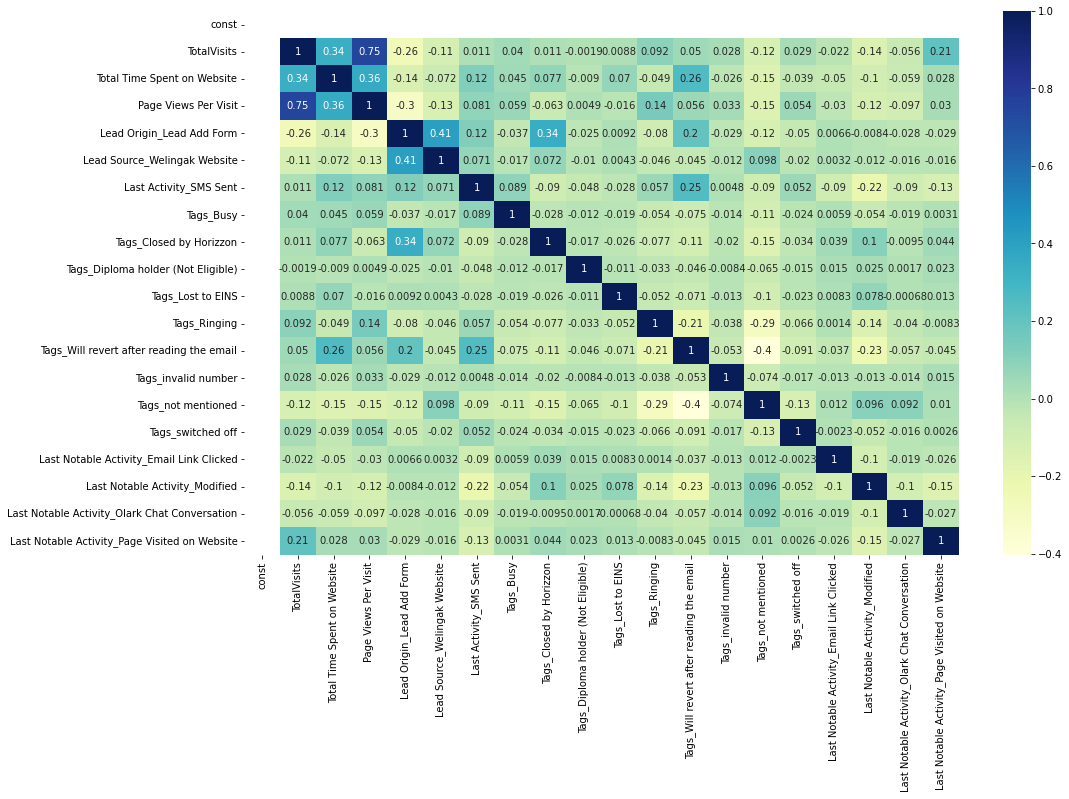

In [3161]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new2.corr(), annot = True, cmap="YlGnBu")
plt.show()

## model 3

In [3162]:
# X_train_3 = X_train_2.drop(['Page Views Per Visit'], axis = 1)
# dropping Page Views Per Visit due to correlation
X_train_new3 = X_train_new2.drop(['Tags_Diploma holder (Not Eligible)'], axis = 1)

In [3163]:
X_train_new3 = sm.add_constant(X_train_new3)
logregm3 = sm.GLM(y_train,X_train_new3,family = sm.families.Binomial())
m3 = logregm3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.9
Date:                Tue, 21 Mar 2023   Deviance:                       2565.9
Time:                        23:00:38   Pearson chi2:                 9.16e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4652      0.207    -16.775      0.000      -3.870      -3.060
TotalVisits                                       1.0785      0.301      3.588      0.000       0.489       1.668
Total Time Spent on Website                       3.8935      0.230     16.944      0.000       3.443       4.344
Page Views Per Visit                             -2.0621      0.280     -7.364      0.000      -2.611      -1.513
Lead Origin_Lead Add Form                         0.8227      0.364      2.262      0.024       0.110       1.536
Lead Source_Welingak Website                      4.0123      0.823      4.874      0.000       2.399       5.626
Last Activity_SMS Sent                            1.9887      0.117     16.954      0.000       1.759       2.219
Tags_Busy                                         2.2945      0.287      7.990      0.000       1.732       2.857
Tags_Closed by Horizzon                           9.2613      1.038      8.926      0.000       7.228      11.295
Tags_Lost to EINS                                 8.0270      0.754     10.652      0.000       6.550       9.504
Tags_Ringing                                     -1.5939      0.287     -5.555      0.000      -2.156      -1.032
Tags_Will revert after reading the email          6.4028      0.252     25.362      0.000       5.908       6.898
Tags_invalid number                              -2.2211      1.145     -1.940      0.052      -4.465       0.023
Tags_not mentioned                                1.8752      0.193      9.737      0.000       1.498       2.253
Tags_switched off                                -1.8415      0.558     -3.300      0.001      -2.935      -0.748
Last Notable Activity_Email Link Clicked         -1.2438      0.468     -2.658      0.008      -2.161      -0.327
Last Notable Activity_Modified                   -1.7978      0.123    -14.565      0.000      -2.040      -1.556
Last Notable Activity_Olark Chat Conversation    -1.4494      0.426     -3.406      0.001      -2.283      -0.615
Last Notable Activity_Page Visited on Website    -1.0003      0.304     -3.288      0.001      -1.597      -0.404
=================================================================================================================
"""

In [3164]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.71
3,Page Views Per Visit,2.58
1,TotalVisits,2.55
11,Tags_Will revert after reading the email,2.32
13,Tags_not mentioned,2.06
4,Lead Origin_Lead Add Form,1.71
10,Tags_Ringing,1.68
8,Tags_Closed by Horizzon,1.44
2,Total Time Spent on Website,1.33
16,Last Notable Activity_Modified,1.28


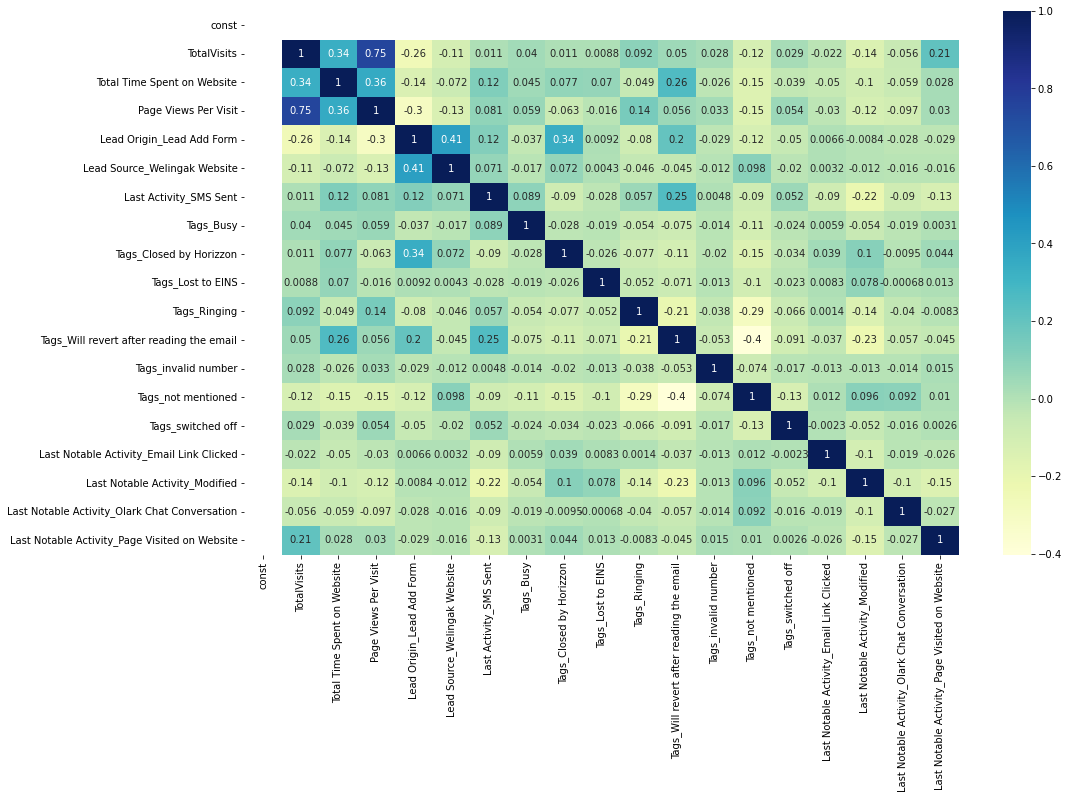

In [3165]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new3.corr(), annot = True, cmap="YlGnBu")
plt.show()

## model4

In [3166]:
# dropping Lead Source_Welingak Website due to correlation
X_train_new4 = X_train_new3.drop(['Lead Source_Welingak Website'], axis = 1)

In [3167]:
X_train_new4 = sm.add_constant(X_train_new4)
logregm4 = sm.GLM(y_train,X_train_new4,family = sm.families.Binomial())
m4 = logregm4.fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1302.7
Date:                Tue, 21 Mar 2023   Deviance:                       2605.4
Time:                        23:00:40   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6041
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5260      0.208    -16.979      0.000      -3.933      -3.119
TotalVisits                                       1.0532      0.300      3.515      0.000       0.466       1.640
Total Time Spent on Website                       3.9111      0.230     17.022      0.000       3.461       4.361
Page Views Per Visit                             -2.0179      0.278     -7.252      0.000      -2.563      -1.473
Lead Origin_Lead Add Form                         2.4003      0.266      9.010      0.000       1.878       2.922
Last Activity_SMS Sent                            1.9634      0.116     16.948      0.000       1.736       2.191
Tags_Busy                                         2.3379      0.287      8.145      0.000       1.775       2.900
Tags_Closed by Horizzon                           8.8779      1.032      8.601      0.000       6.855      10.901
Tags_Lost to EINS                                 8.0403      0.754     10.657      0.000       6.562       9.519
Tags_Ringing                                     -1.6824      0.290     -5.791      0.000      -2.252      -1.113
Tags_Will revert after reading the email          6.3511      0.252     25.180      0.000       5.857       6.845
Tags_invalid number                              -2.1572      1.146     -1.883      0.060      -4.403       0.088
Tags_not mentioned                                1.9600      0.193     10.137      0.000       1.581       2.339
Tags_switched off                                -1.7754      0.558     -3.180      0.001      -2.869      -0.681
Last Notable Activity_Email Link Clicked         -1.1628      0.453     -2.568      0.010      -2.050      -0.275
Last Notable Activity_Modified                   -1.7846      0.121    -14.713      0.000      -2.022      -1.547
Last Notable Activity_Olark Chat Conversation    -1.4668      0.423     -3.465      0.001      -2.296      -0.637
Last Notable Activity_Page Visited on Website    -0.9764      0.299     -3.268      0.001      -1.562      -0.391
=================================================================================================================
"""

In [3168]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.71
3,Page Views Per Visit,2.58
1,TotalVisits,2.55
10,Tags_Will revert after reading the email,2.29
12,Tags_not mentioned,2.05
9,Tags_Ringing,1.68
7,Tags_Closed by Horizzon,1.43
4,Lead Origin_Lead Add Form,1.42
2,Total Time Spent on Website,1.33
15,Last Notable Activity_Modified,1.28


In [3169]:
# plt.figure(figsize = (16, 10))
# sns.heatmap(X_train_new4.corr(), annot = True, cmap="YlGnBu")
# plt.show()

## Evaluation

In [3170]:
y_train_pred = m4.predict(X_train_new4)
y_train_pred[:10]

1871    0.005441
6795    0.311766
3516    0.004551
8105    0.088635
3934    0.033877
4844    0.999163
3297    0.003800
8071    0.997912
987     0.100819
7423    0.999299
dtype: float64

In [3171]:
Lead_train_pred = pd.DataFrame({"Converted":y_train.values,"Convert_prob":y_train_pred})
Lead_train_pred.head()

,Converted,Convert_prob
1871,0,0.005441
6795,0,0.311766
3516,0,0.004551
8105,0,0.088635
3934,0,0.033877


In [3172]:
Lead_train_pred['Converted_pred'] = Lead_train_pred['Convert_prob'].apply(lambda x:1 if x>0.5 else 0)

In [3173]:
confusion = metrics.confusion_matrix(Lead_train_pred['Converted'],Lead_train_pred['Converted_pred'])
print(confusion)

[[3816  186]
 [ 283 2183]]


In [3174]:
print(metrics.accuracy_score(Lead_train_pred['Converted'],Lead_train_pred['Converted_pred']))

0.9274891774891775


- Accuracy=92%

In [3175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [3176]:
TP / float(TP+FN)

0.8852392538523925

In [3177]:
TN / float(TN+FP)

0.9535232383808095

In [3178]:
TP / float(TP+FP)

0.9214858590122414

In [3179]:
print(FP/ float(TN+FP))

0.046476761619190406


In [3180]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3181]:
fpr, tpr, thresholds = metrics.roc_curve(Lead_train_pred['Converted'], Lead_train_pred['Convert_prob'], drop_intermediate = False )

## Cut off

In [3182]:
cutoff_values = [0.1,0.2,0.3,0.4,0.5,0.6]

for i in cutoff_values:
    Lead_train_pred[i] = Lead_train_pred['Convert_prob'].apply(lambda x:1 if x>i else 0)
    
Lead_train_pred.head()

,Converted,Convert_prob,Converted_pred,0.1,0.2,0.3,0.4,0.5,0.6
1871,0,0.005441,0,0,0,0,0,0,0
6795,0,0.311766,0,1,1,1,0,0,0
3516,0,0.004551,0,0,0,0,0,0,0
8105,0,0.088635,0,0,0,0,0,0,0
3934,0,0.033877,0,0,0,0,0,0,0


In [3183]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in num:
    cm1 = metrics.confusion_matrix(Lead_train_pred['Converted'], Lead_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.828386  0.972425  0.739630
0.2   0.2  0.898732  0.926196  0.881809
0.3   0.3  0.922233  0.915653  0.926287
0.4   0.4  0.927180  0.902271  0.942529
0.5   0.5  0.927489  0.885239  0.953523
0.6   0.6  0.918522  0.835361  0.969765


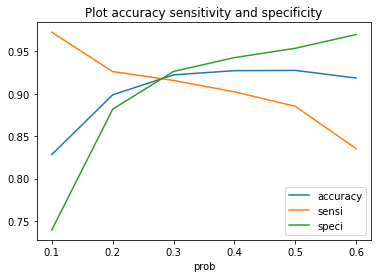

In [3184]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

In [3185]:
Lead_train_pred['Convert_pred_op'] = Lead_train_pred['Convert_prob'].apply(lambda x: 1 if x>0.4 else 0)
confusion_op = metrics.confusion_matrix(Lead_train_pred['Converted'],Lead_train_pred['Convert_pred_op'])
confusion_op 

array([[3772,  230],
       [ 241, 2225]], dtype=int64)

In [3186]:
TP_op = 2221 # true positive 
TN_op= 3762 # true negatives
FP_op = 240 # false positives
FN_op= 245 # false negatives

In [3187]:
# Let's see Accuracy
(TP_op+TN_op)/6468

0.9250154607297465

In [3188]:
# Let's see the sensitivity/Recall 
TP_op / float(TP_op+FN_op)

0.9006488240064883

In [3189]:
# Let us calculate specificity
TN_op / float(TN_op+FP_op)

0.9400299850074962

In [3190]:
# Let us calculate precision
TP_op / float(TP_op+FP_op)

0.9024786672084518

## Train Data

In [3191]:
## Calculate Precicion and Recall
p,r,thresholds = precision_recall_curve(Lead_train_pred['Converted'],Lead_train_pred['Convert_prob'])

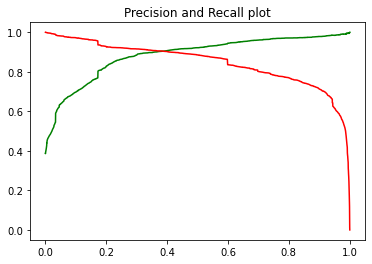

In [3192]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.title("Precision and Recall plot")
plt.show()

In [3193]:
X_train_new4 = X_train_new4.drop(['const'], axis=1)

In [3194]:
X_test_new = X_test[X_train_new4.columns]

In [3195]:
X_test_new = sm.add_constant(X_test_new)

In [3196]:
y_test_pred = m4.predict(X_test_new)

In [3197]:
Lead_test_pred = pd.DataFrame({"Converted":y_test.values,"Convert_prob":y_test_pred})
Lead_test_pred.head()

,Converted,Convert_prob
4269,1,1.000000
2376,1,0.999246
7766,1,1.000000
9199,0,0.004915
4359,1,0.994651


In [3198]:
Lead_test_pred['Converted_pred'] = Lead_test_pred['Convert_prob'].apply(lambda x:1 if x>0.4 else 0)


In [3199]:
confusion_test = metrics.confusion_matrix(Lead_test_pred['Converted'],Lead_test_pred['Converted_pred'])
print(confusion_test)

[[ 369 1308]
 [  36 1059]]


In [3200]:
# accuracy
print(metrics.accuracy_score(Lead_test_pred['Converted'],Lead_test_pred['Converted_pred']))

0.5151515151515151


In [3201]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [3202]:
# Let's see the sensitivity/Recall of our logistic regression model
TP_test / float(TP_test+FN_test)

0.9671232876712329

In [3203]:
# Let us calculate specificity
TN_test / float(TN_test+FP_test)

0.22003577817531306

In [3204]:
# Let us calculate specificity
TN_test / float(TN_test+FP_test)

0.22003577817531306

In [3205]:
# Let us calculate precision
(TP_test / float(TP_test+FP_test))*(TP_test / float(TP_test+FN_test))

0.43269267496571007

In [3206]:
(TP_test / float(TP_test+FP_test))+(TP_test / float(TP_test+FN_test))

1.4145250620692051

In [3207]:
2*((TP_test / float(TP_test+FP_test))*(TP_test / float(TP_test+FN_test))/(TP_test / float(TP_test+FP_test))+(TP_test / float(TP_test+FN_test)))

3.8684931506849316